In [109]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
df = pd.read_csv('MLCleanedData.csv')
#print(df.columns)

In [71]:
feature_columns = ['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF',
                   'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']

X = df[feature_columns]
y = df['WTeamID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the number of estimators as desired
rf.fit(X_train, y_train)

# Evaluate the model's performance on the testing data
score = rf.score(X_test, y_test)
print("R-squared:", score)

# Obtain the feature importance scores
feature_importances = rf.feature_importances_

# Print the feature importance scores
for feature, importance in zip(feature_columns, feature_importances):
    print(feature, ":", importance)

KeyboardInterrupt: 

In [72]:
# Load your basketball dataset into a pandas DataFrame
df = pd.read_csv('seasonStats2.csv')

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)]
#df = df.loc[(df['Season'] == 2004) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)] 
df = df[df["AVGFGA"] != -1]

statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["RAT" + stat for stat in statsToMeasure]

selected = statsMeasured
x = df.loc[:, statsMeasured].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])


df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=4), "GamesWon"] = 4
principalDf.loc[(principalDf["GamesWon"] >= 5) & (principalDf["GamesWon"] <=8), "GamesWon"] = 8
principalDf.loc[(principalDf["GamesWon"] >= 9) & (principalDf["GamesWon"] <= 12), "GamesWon"] = 12
principalDf.loc[(principalDf["GamesWon"] >= 13) & (principalDf["GamesWon"] <=16), "GamesWon"] = 16
principalDf.loc[(principalDf["GamesWon"] >= 17) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 24), "GamesWon"] = 24
principalDf.loc[(principalDf["GamesWon"] >= 25) & (principalDf["GamesWon"] <=28), "GamesWon"] = 28
principalDf.loc[(principalDf["GamesWon"] >= 29) & (principalDf["GamesWon"] <=32), "GamesWon"] = 32
principalDf.loc[(principalDf["GamesWon"] >= 33) & (principalDf["GamesWon"] <= 36), "GamesWon"] = 36
principalDf.loc[(principalDf["GamesWon"] >= 37), "GamesWon"] = 40


In [126]:
contamination = 0.01
n_estimators = 1000
isolation_forest = IsolationForest(contamination=contamination, n_estimators=n_estimators)
isolation_forest.fit(x)
outliers_original = isolation_forest.predict(x)


In [127]:
isolation_forest_pca = IsolationForest(contamination=contamination, n_estimators=n_estimators)
isolation_forest_pca.fit(principalDf.loc[:, ['pc1', 'pc2']])
outliers_pca = isolation_forest_pca.predict(principalDf.loc[:, ['pc1', 'pc2']])


/home/joey/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [87]:
print("Outliers in the original dataset:")
print(np.where(outliers_original == -1)[0])
#
print("Outliers in the PCA dataset:")
print(np.where(outliers_pca == -1)[0])
# 2004 Connecticut team ID 1163


Outliers in the original dataset:
[4905]
Outliers in the PCA dataset:
[2187]


In [91]:
outlier_pca = df.iloc[4905]
print(outlier_pca)

index         4925.000000
Unnamed: 0    4925.000000
Season        2013.000000
TeamID        1176.000000
GamesWon        21.000000
HighDay         -1.000000
AVGScore        65.433333
AVGFGM          23.233333
AVGFGA          48.300000
AVGFGM3          8.166667
AVGFGA3         21.466667
AVGFTM          10.800000
AVGFTA          14.633333
AVGOR            6.200000
AVGDR           18.766667
AVGAst          16.366667
AVGTO           11.100000
AVGStl           9.000000
AVGBlk           4.433333
AVGPF           17.500000
OAVGScore       55.700000
OAVGFGM         19.300000
OAVGFGA         44.700000
OAVGFGM3         3.600000
OAVGFGA3        10.966667
OAVGFTM         13.500000
OAVGFTA         18.800000
OAVGOR           9.833333
OAVGDR          21.100000
OAVGAst          8.700000
OAVGTO          15.866667
OAVGStl          4.766667
OAVGBlk          2.366667
OAVGPF          14.500000
RATScore         1.174746
RATFGM           1.203800
RATFGA           1.080537
RATFGM3          2.268519
RATFGA3     

In [92]:
outlier_index_pca = 2187  # Index of the outlier in the PCA data

# Retrieve the corresponding index label in the original dataset
original_index_label = principalDf.index[outlier_index_pca]

# Retrieve the corresponding row from the original dataset
outlier_entry = df.loc[original_index_label]

# Print the outlier entry
print(outlier_entry)

index         2191.000000
Unnamed: 0    2191.000000
Season        2009.000000
TeamID        1163.000000
GamesWon        27.000000
HighDay          5.000000
AVGScore        77.322581
AVGFGM          27.387097
AVGFGA          58.258065
AVGFGM3          4.741935
AVGFGA3         13.677419
AVGFTM          17.806452
AVGFTA          26.290323
AVGOR           14.225806
AVGDR           28.516129
AVGAst          15.387097
AVGTO           12.677419
AVGStl           5.806452
AVGBlk           8.000000
AVGPF           12.903226
OAVGScore       63.967742
OAVGFGM         24.451613
OAVGFGA         64.838710
OAVGFGM3         6.193548
OAVGFGA3        19.774194
OAVGFTM          8.870968
OAVGFTA         12.516129
OAVGOR          13.096774
OAVGDR          21.354839
OAVGAst         12.193548
OAVGTO          12.032258
OAVGStl          6.580645
OAVGBlk          3.741935
OAVGPF          20.870968
RATScore         1.208775
RATFGM           1.120053
RATFGA           0.898507
RATFGM3          0.765625
RATFGA3     

In [53]:
from sklearn.metrics import silhouette_score

# Perform outlier detection using Isolation Forest
outliers_predicted = isolation_forest.predict(x)

# Calculate the silhouette coefficient
silhouette = silhouette_score(x, outliers_predicted)

print("Silhouette Coefficient:", silhouette)
print("Predicted Outliers:", outliers_predicted)

Silhouette Coefficient: 0.5179881430014627
Predicted Outliers: [1 1 1 ... 1 1 1]


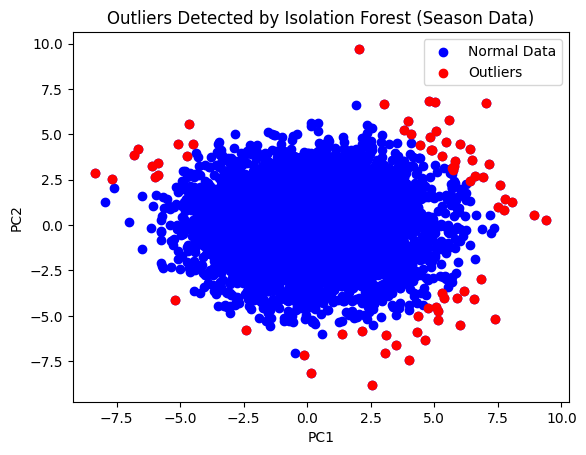

In [146]:
import matplotlib.pyplot as plt
# Get the indices of outliers in the PCA dataset
outliers_pca_indices = np.where(outliers_pca == -1)[0]

# Plot the PCA dataset
plt.scatter(principalDf['pc1'], principalDf['pc2'], c='blue', label='Normal Data')
# Highlight the outliers
plt.scatter(principalDf.loc[outliers_pca_indices, 'pc1'], principalDf.loc[outliers_pca_indices, 'pc2'], c='red', label='Outliers')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Outliers Detected by Isolation Forest (Season Data)')
plt.legend()
plt.savefig("iso_season.png", dpi=200)

plt.show()


In [95]:
df = pd.read_csv('MLCleanedData.csv')


In [96]:
feature_columns = ['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF',
                   'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
                   'WScore', 'LScore']

In [97]:
featureData = df.loc[:, feature_columns].values

In [141]:
clf = IsolationForest(random_state=0, contamination=0.0005)
clf.fit(featureData)

IsolationForest(contamination=0.0005, random_state=0)

In [142]:
outliers = np.array(clf.predict(featureData))
df['outlier'] = outliers
df.loc[df['outlier'] == -1]

Unnamed: 0  Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc   
37             241    2003      65     1325     112     1103     104    H  \
2311          2689    2003     117     1393      93     1207      84    A   
3067         26130    2003     110     1383     142     1254     140    H   
5970         14531    2004      82     1161      92     1361      82    H   
7435        211611    2004      44     1407     107     1239      99    H   
9513        191112    2005      90     1198     118     1114     114    H   
11448       221092    2005      28     1273     103     1204      94    H   
21865       121524    2007      89     1251     122     1440     117    H   
21870       161364    2007     114     1251     118     1440     108    A   
22246       161574    2007      40     1273     105     1440     103    A   
22981       212524    2007      61     1336     129     1440     111    H   
23451       192704    2007      54     1397     111     1400     105    H   
23482       242754    2007      96     1426     110     1402     103    A   
23571       223094    2007      84     1440     102     1421      97    A   
23628        27298    2007      68     1457     108     1440      76    H   
24163       301013    2008      85     1369     121     1122     116    H   
24219       161918    2008      79     1124     116     1401     110    A   
24987        31245    2008      97     1314     103     1155      93    H   
30092        29376    2009      87     1430     123     1152     121    A   
30384        31306    2009     129     1393     127     1163     117    N   
32120        33246    2009      11     1440     111     1246     103    A   
33492       242296    2009     124     1347     108     1440      94    H   
35762        12637    2010     103     1168     113     1169     112    A   
37751       201567    2010     117     1267     121     1416     115    H   
38963       132587    2010      40     1371     134     1440     107    H   
41668        10888    2011      85     1195     111     1391     103    A   
43611       261968    2011      80     1430     107     1315      96    A   
43731       311519    2011      47     1382     112     1325     107    H   
52607      1212410    2013      13     1220     103     1267     100    H   
53356       326114    2013      96     1323     104     1257     101    H   
55529       151250    2014     130     1117     116     1114     114    N   
65928       271200    2016     128     1424     108     1102     102    N   
71384        44100    2017     103     1106      97     1105      89    H   
72573       224914    2017      49     1420     120     1154     111    H   
73737       306314    2017     100     1461     102     1201     100    H   
76162      3213114    2017     101     1459     131     1359     127    H   
77224        82090    2018      48     1124     118     1366      86    H   
77303      1522100    2018     117     1126     121     1366      92    H   
78432       313915    2018     120     1382     117     1172     113    H   
79435      1610715    2018     112     1214     114     1366     102    H   
80170      1514415    2018      91     1252     110     1367     106    A   
80708      2317915    2018      26     1335     101     1284      96    A   
81634      3019312    2018      33     1456     108     1366      85    A   
81635      2525415    2018      44     1401     113     1366      66    H   
85031      2115416    2019     110     1358     119     1223     113    H   
87075      2824512    2019       2     1401      98     1366      83    H   
92119      1622317    2020      61     1334     107     1388      99    H   
92805      2033118    2020       5     1444     115     1454     110    A   
94623        59618    2021      23     1209     123     1210     120    A   
97179      2915102    2022      23     1163     115     1120     109    N   
98737       128519    2022      40     1185      92     1198      88    H   
9953

In [143]:

# Extract the feature data
featureData = df.loc[:, feature_columns].values

# Standardize the features
scaler = StandardScaler()
scaledData = scaler.fit_transform(featureData)

# Perform PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)

# Create a dataframe for the PCA data
pca_df = pd.DataFrame(data=pcaData, columns=['PC1', 'PC2'])

# Add the outlier label to the dataframe
outliers = np.array(clf.predict(featureData))
pca_df['outlier'] = outliers

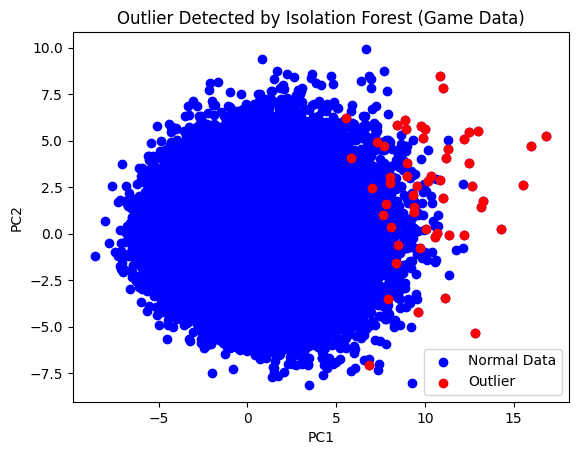

In [147]:


# Select the outlier rows
outliers_pca_df = pca_df.loc[pca_df['outlier'] == -1]

# Plot the PCA data and highlight the outlier
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', label='Normal Data')
plt.scatter(outliers_pca_df['PC1'], outliers_pca_df['PC2'], c='red', label='Outlier')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Outlier Detected by Isolation Forest (Game Data)')
plt.legend()
plt.savefig("iso_game.png", dpi=200)
plt.show()
